In [24]:
import warnings;
warnings.simplefilter('ignore')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6

In [26]:
df_awards = pd.read_csv('DataFrame/df_awards.csv', index_col=0)

In [27]:
df_awards['effective_date'] = df_awards['effective_date'].apply(lambda x: str(x)[:4])
df_awards.drop(columns=['title', 'abstract', 'directorate', 'division_code'],inplace=True)

In [28]:
df_OHE = pd.get_dummies(df_awards, columns = ['program_element_code', 'effective_date', 'state_code'])

In [29]:
df_OHE.to_csv('DataFrame/df_OHE.csv')

# Random Forest ML

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = df_OHE.amount
X = df_OHE.drop(['amount'], axis=1)

# Divide data into training and validation subsets
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [31]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print("mean absolute error:")
print(mean_absolute_error(val_y, melb_preds))

mean absolute error:
281267.2061966365


# XGBoost Model

In [32]:
from xgboost import XGBRegressor

In [33]:
# Define the model
my_model = XGBRegressor()
# Fit the model
my_model.fit(train_X, train_y)
# Get predictions
predictions = my_model.predict(val_X)
# Calculate MAE
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 299704.2520731424


In [34]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

# Fit the model
my_model_2.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)            

# Get predictions
predictions_2 = my_model_2.predict(val_X)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, val_y)
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 284288.3748787193


# Trend Graph of Phrases
Displays a trend line of a phrase for years 2012-2020

In [35]:
dataset = pd.read_csv('DataFrame/df_awards.csv', index_col=0)
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'], infer_datetime_format=True)

In [36]:
phraseList = pd.read_csv('DataFrame/phraseList.csv')

In [37]:
phrases = phraseList.phrase.iloc[:10]

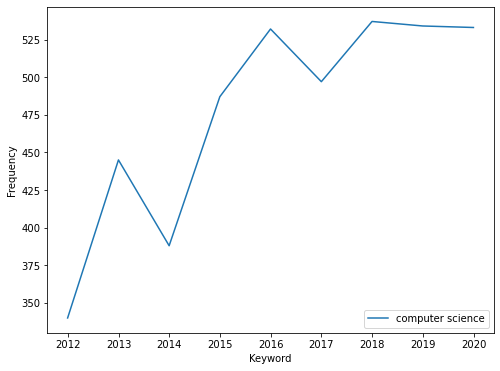

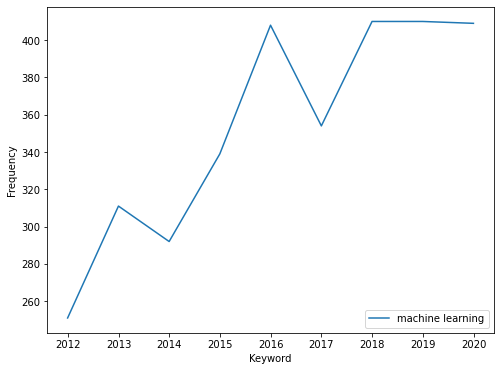

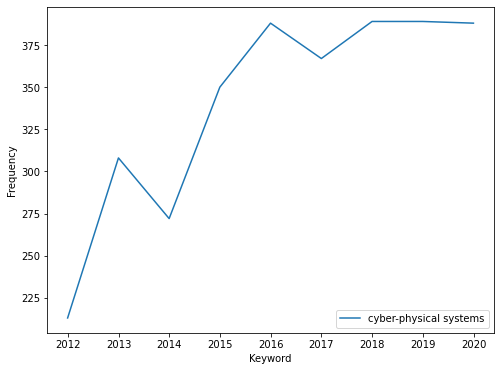

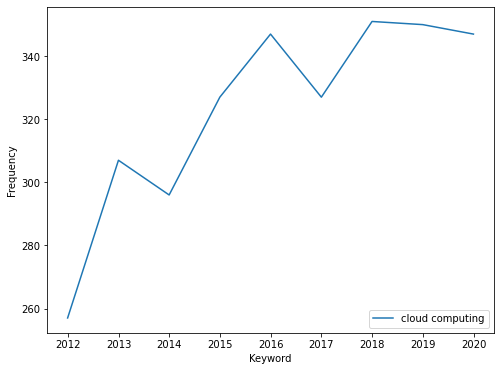

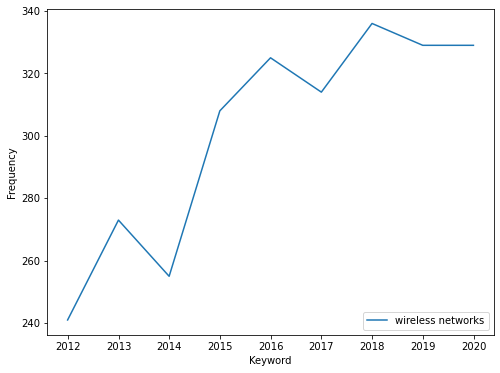

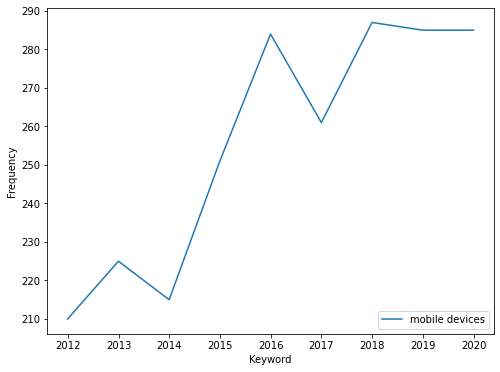

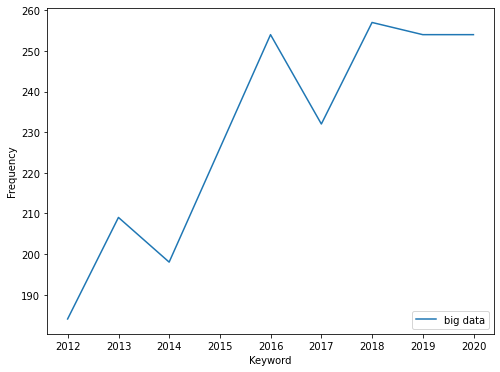

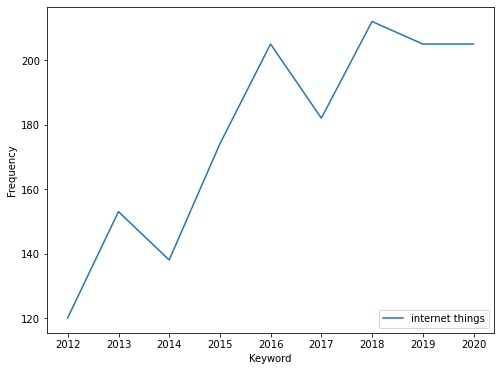

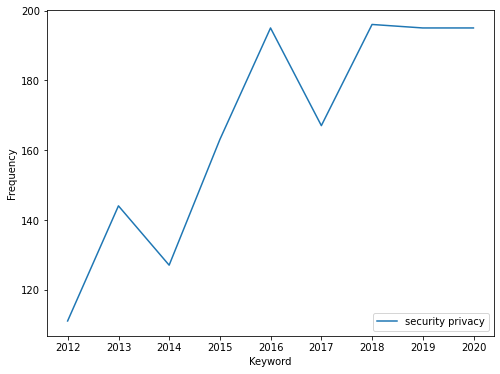

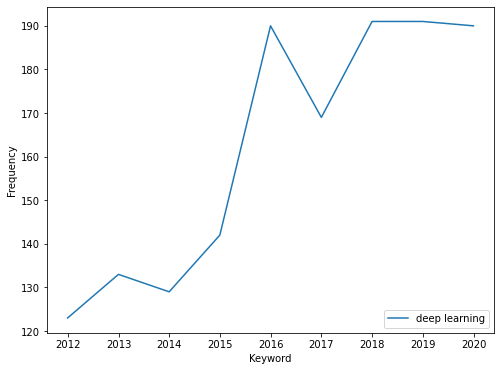

In [38]:
for phrase in phrases:
    df_LR_ML = dataset[['effective_date', phrase]]
    indexedDataset = df_LR_ML.set_index(['effective_date'])

    datasetMonthly = indexedDataset.groupby(pd.Grouper(freq="Y")).sum()
    datasetMonthly.drop(datasetMonthly.tail(1).index,inplace=True)
    plt.figure()
    plt.xlabel("Keyword")
    plt.ylabel("Frequency")
    
    plt.plot(datasetMonthly, label=phrase)
    plt.legend(loc="lower right")

# ARIMA (Autoregressive Integrated Moving Average Model)
A model that uses the dependent relationship between an observation and some number of lagged observations.

In [39]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

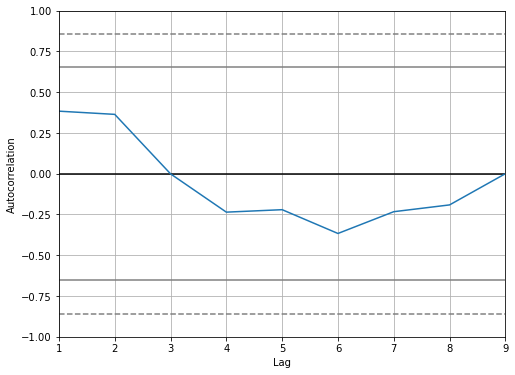

predicted=532.000000, expected=497.000000
predicted=497.000000, expected=537.000000
predicted=537.000000, expected=534.000000
predicted=534.000000, expected=535.000000
Test RMSE: 26.622


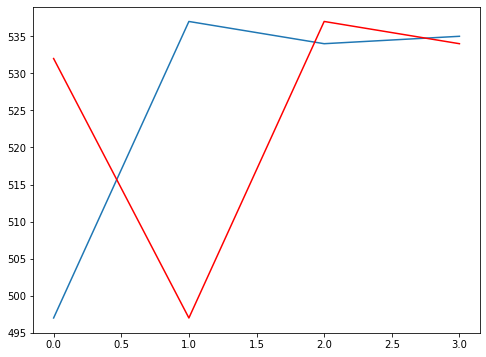

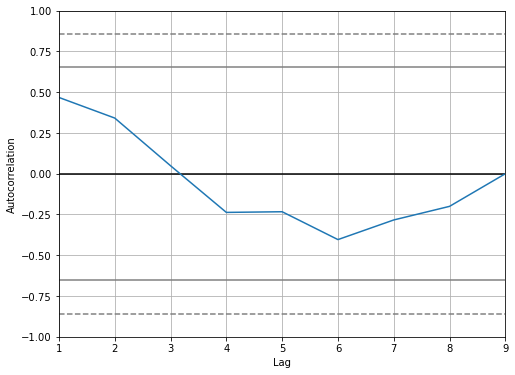

predicted=408.000000, expected=354.000000
predicted=354.000000, expected=410.000000
predicted=410.000000, expected=410.000000
predicted=410.000000, expected=410.000000
Test RMSE: 38.897


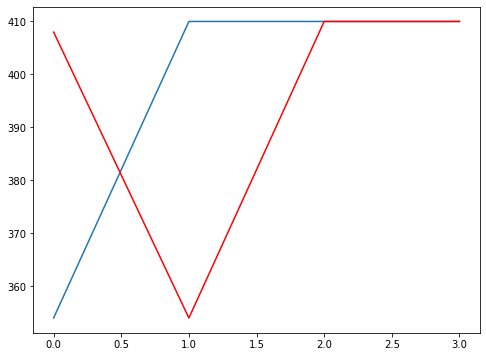

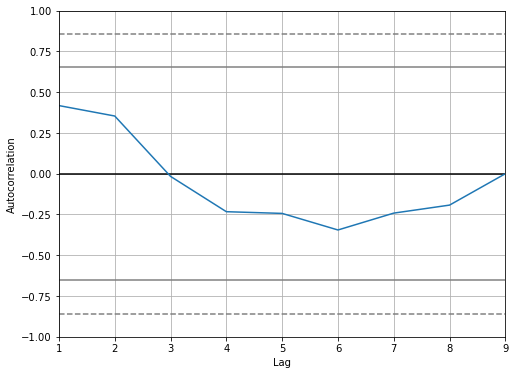

predicted=388.000000, expected=367.000000
predicted=367.000000, expected=389.000000
predicted=389.000000, expected=389.000000
predicted=389.000000, expected=389.000000
Test RMSE: 15.207


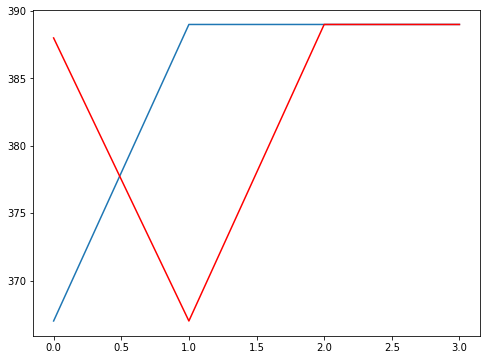

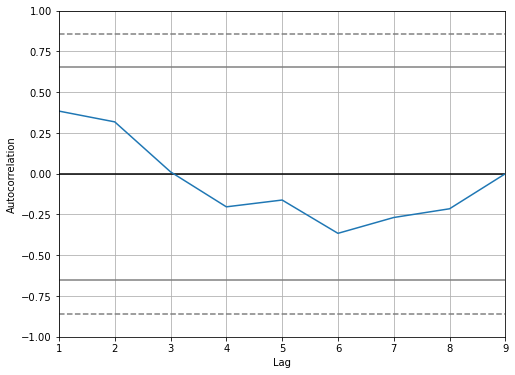

predicted=347.000000, expected=327.000000
predicted=327.000000, expected=351.000000
predicted=351.000000, expected=350.000000
predicted=350.000000, expected=350.000000
Test RMSE: 15.628


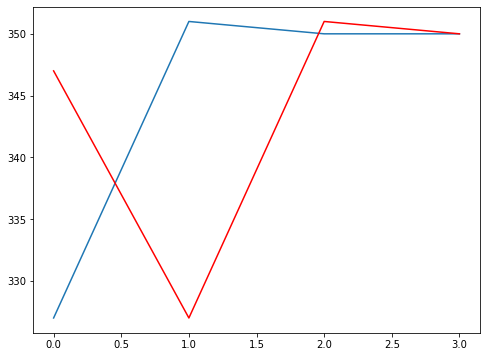

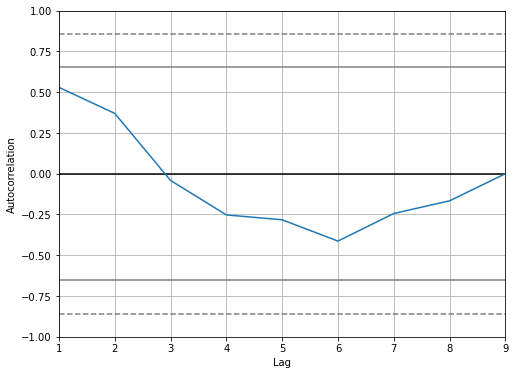

predicted=325.000000, expected=314.000000
predicted=314.000000, expected=336.000000
predicted=336.000000, expected=329.000000
predicted=329.000000, expected=329.000000
Test RMSE: 12.787


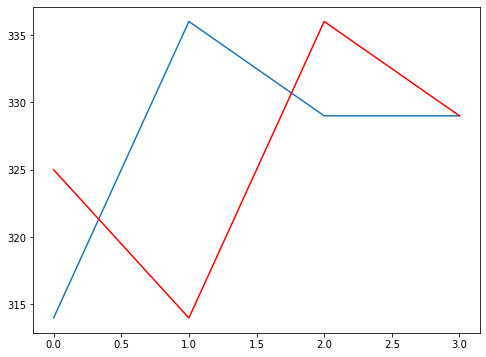

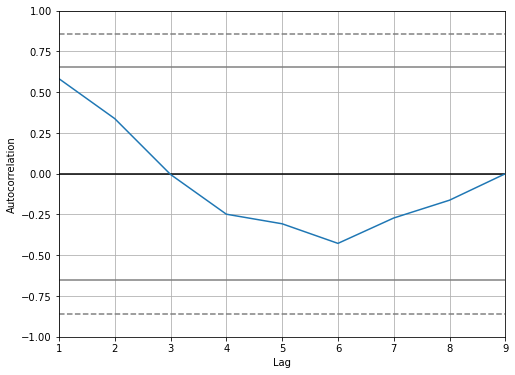

predicted=284.000000, expected=261.000000
predicted=261.000000, expected=287.000000
predicted=287.000000, expected=285.000000
predicted=285.000000, expected=285.000000
Test RMSE: 17.385


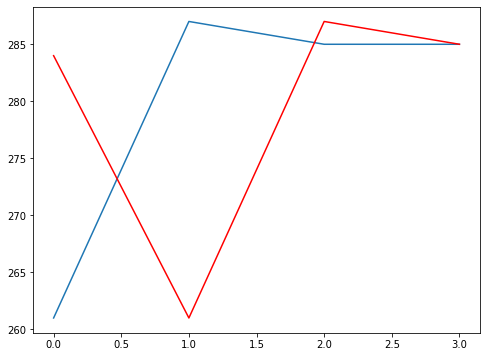

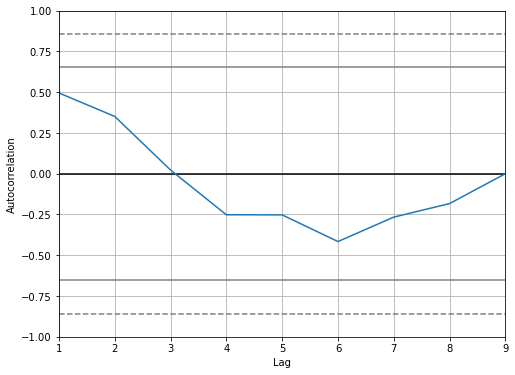

predicted=254.000000, expected=232.000000
predicted=232.000000, expected=257.000000
predicted=257.000000, expected=254.000000
predicted=254.000000, expected=254.000000
Test RMSE: 16.718


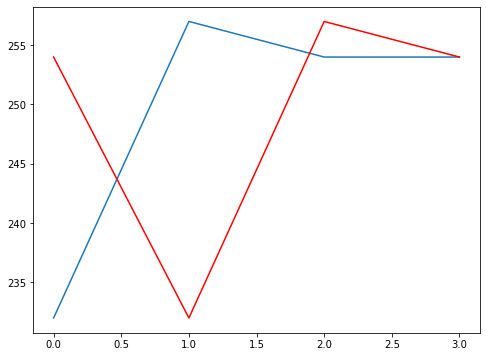

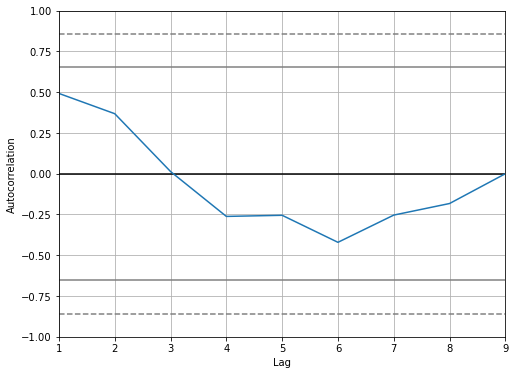

predicted=205.000000, expected=182.000000
predicted=182.000000, expected=212.000000
predicted=212.000000, expected=205.000000
predicted=205.000000, expected=206.000000
Test RMSE: 19.229


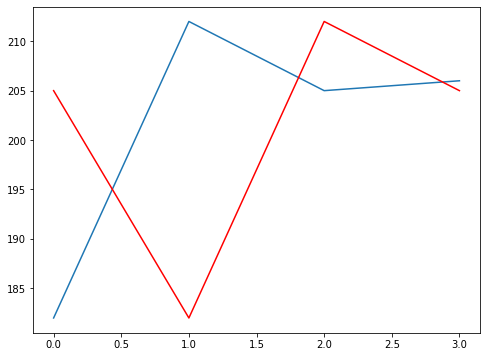

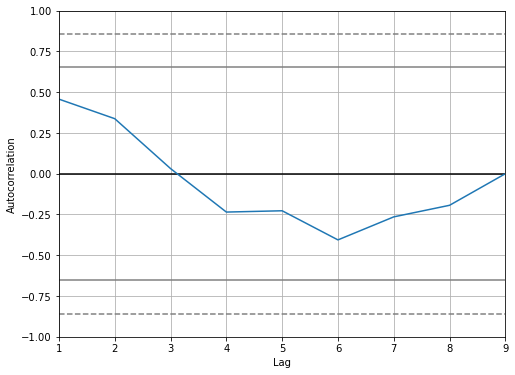

predicted=195.000000, expected=167.000000
predicted=167.000000, expected=196.000000
predicted=196.000000, expected=195.000000
predicted=195.000000, expected=196.000000
Test RMSE: 20.168


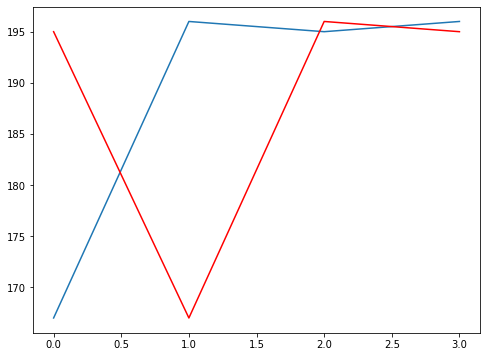

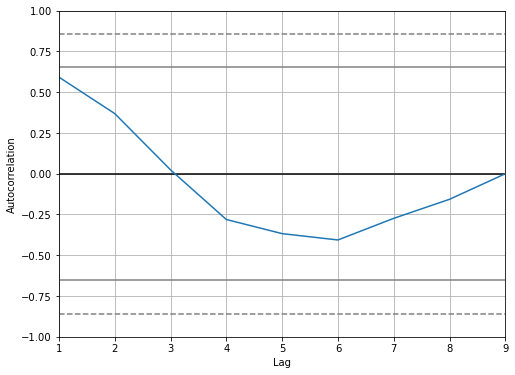

predicted=190.000000, expected=169.000000
predicted=169.000000, expected=191.000000
predicted=191.000000, expected=191.000000
predicted=191.000000, expected=191.000000
Test RMSE: 15.207


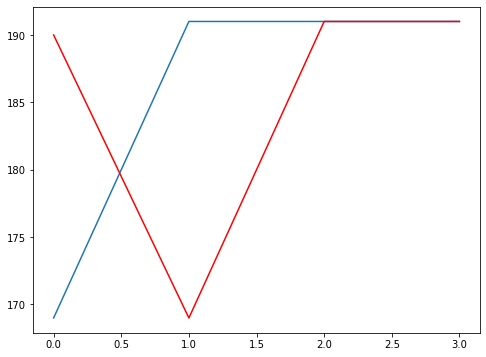

In [40]:
# evaluate an ARIMA model using a walk-forward validation
for phrase in phrases:
    if(phrase == 'covid-19 pandemic' or phrase == 'reinforcement learning'):
        continue
        
    dataset.effective_date = pd.to_datetime(dataset.effective_date)
    
    df_LR_ML = dataset[['effective_date', phrase]]
    indexedDataset = df_LR_ML.set_index(['effective_date'])

    dataset_monthly = indexedDataset.groupby(pd.Grouper(freq="Y")).sum()
    dataset_monthly.drop(datasetMonthly.tail(1).index,inplace=True)

    plt.figure()
    
#     # based on the autocorrelation plot, 
#     # there appears to be a positive correlation for the first 3 lags 
#     # but it is not significant so that is why I am setting the AR parameter to 0
    
    autocorrelation_plot(dataset_monthly)
    pyplot.show()

    plt.xlabel("Time (years)")
    plt.ylabel("Frequency")
    
    plt.plot(datasetMonthly, label=row.phrase)
    plt.legend(loc="lower right")

# split into train and test sets
    X = dataset_monthly.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(0,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    
    plt.close()
# plot forecasts against actual outcomes
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()
